In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
import pandas as pd
from astropy.time import Time

from Functions import Load_LC, NormalizeFlux

#globally change font size for plots
plt.rcParams['font.size'] =17
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [6]:
# define function that converts bjd dates to UTC times
def time_bjd_isot(time_array):
    tm = Time(time_array-2400000, format='mjd')
    return tm.isot

In [7]:
#File Locations for HAT_P-2b
HAT_P_2_Loc = ["data/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000039903405-s0024_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000039903405-s0024_tess_v1_lc.fits",
            "data/mastDownload/HLSP/hlsp_tess-spoc_tess_phot_0000000039903405-s0025_tess_v1_tp/hlsp_tess-spoc_tess_phot_0000000039903405-s0025_tess_v1_lc.fits"
]
Time1, Flux1 = Load_LC(HAT_P_2_Loc)


HD189733_Loc = ["data/mastDownload/TESS/tess2021204101404-s0041-0000000256364928-0212-s/tess2021204101404-s0041-0000000256364928-0212-s_lc.fits" ]
Time2, Flux2 = Load_LC(HD189733_Loc)


#Save the flux around the transit
T0 = [ 2455288.84969, #de Wit et al. 2017
        2453955.525551 #Bonomo et al. 2017
]


Period = [ 5.6334675, #de Wit et al. 2017
           2.218575200 #Bonomo et al. 2017
         ]


TDur = [4.28/24.0,   #Pal et al 2010
        1.84/24.0*1.2    #Addison et al 2019
        ]

In [8]:
#Find where the transit occurs
TransitMask1 = np.abs(Time1-T0[0]+TDur[0]/2.*1.5)%Period[0]<TDur[0]*1.5
TransitMask2_1 = np.abs(Time2-T0[1]+TDur[1]/2.)%Period[1]<TDur[1]
TransitMask2_2 = np.abs(Time2-T0[1]+TDur[1]/2.*2.5)%Period[1]<TDur[1]*2.5


#Get lomb scargle for HAT-P-2b
frequency, power = LombScargle(Time1[~TransitMask1], Time1[~TransitMask1]).autopower()




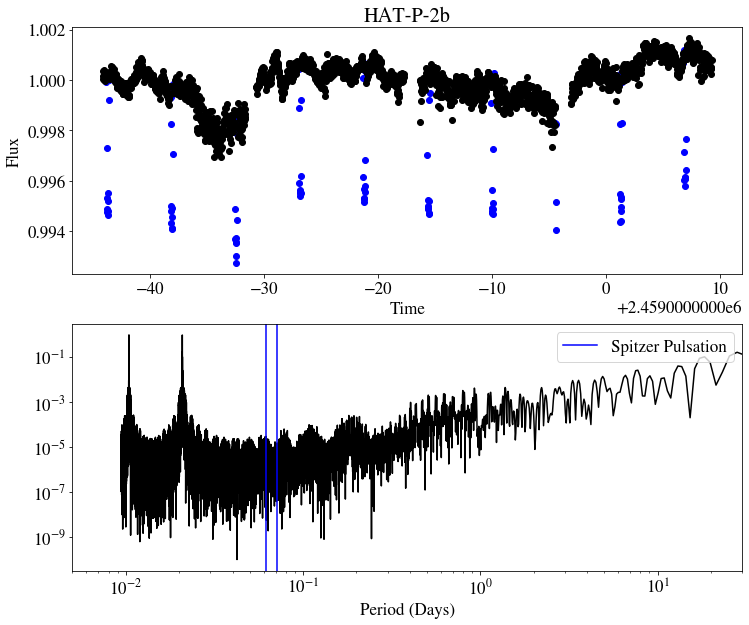

In [9]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(Time1[TransitMask1], Flux1[TransitMask1], "bo", label="Transit Points")
plt.plot(Time1[~TransitMask1], Flux1[~TransitMask1], "ko", label="Non-Transit Points")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("HAT-P-2b")
plt.subplot(212)
plt.plot(1./frequency, power, "k-")

plt.axvline(x=Period[0]/79, color="blue", label="Spitzer Pulsation")
plt.axvline(x=Period[0]/91, color="blue")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=1)
plt.xlabel("Period (Days)")
plt.xlim(0.005, 30)
plt.show()


#plt.figure(figsize=(12,8))
#plt.plot(Time2[~TransitMask2_1], Flux2[~TransitMask2_1], "ko")
#plt.plot(Time2[TransitMask2_1], Flux2[TransitMask2_1], "ro")
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [10]:
#unique_transits

0.022367449656760158
0.00079519337
Wait here...


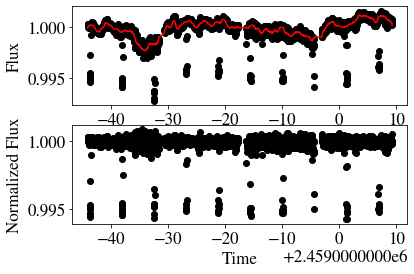

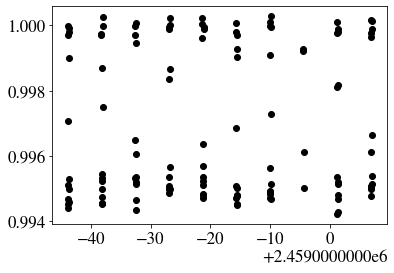

In [11]:
print(np.mean(np.diff(Time1)))

#Flux2 = Flux2[~np.isnan(Flux2)]
print(np.nanstd(Flux1[~TransitMask1]))
input("Wait here...")

SelectedTime = Time1[TransitMask1]
SelectedFlux = Flux1[TransitMask1]


NormalizedFlux1 = NormalizeFlux(Time1, Flux1, TransitMask1)
#NormalizedFlux = NormalizeFlux(Time2, Flux2, TransitMask2_1)


plt.figure()
plt.plot(Time1[TransitMask1], NormalizedFlux1[TransitMask1], "ko")
plt.show()


#np.savetxt("HD189733bLC.txt", np.transpose((Time2[TransitMask2_2], NormalizedFlux[TransitMask2_2])), header="Time, Flux", delimiter=",")

np.savetxt("HATP2bLC.txt", np.transpose((Time1[TransitMask1], NormalizedFlux1[TransitMask1])), header="Time, Flux", delimiter=",")
#Now now normalize the light curve

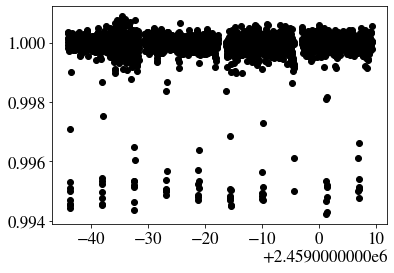

In [12]:
plt.figure()
plt.plot(Time1, NormalizedFlux1, "ko")
plt.show()

In [13]:
!ls

Allesfitter.ipynb                    Spitzer
Bakos.csv                            Spitzer_2017.rtf
Download.py                          Spitzer_2017_transit_only.rtf
Figures                              Spitzer_2017_transit_only.txt
Functions.py                         Spitzer_AORs
HAT-P2-b.csv                         TTVs_Ben_Ivshina_Julien_combined.pdf
HATP2bLC.txt                         Visualize_HD189733b.py
HD189733bLC.txt                      __pycache__
HD189733b_Transits.pdf               data
HD189733b_Transits.png               downloader1.sh
PlotHD189733b.py                     error_log.txt
Process.py                           posteriors__full_dataset_ttvs.csv
Process_TESS_data.ipynb              sampler.py
ReadNPY.py                           usetex.ipynb


In [14]:
T0_ivshina = 2455756.4270934
P_ivshina = 5.6334696164 

Bakos_transit

NameError: name 'Bakos_transit' is not defined

In [15]:
# Add Bakos et al. 2007 data
Bakos_transit = pd.read_csv('Bakos.csv')

Bakos_Tmid = 2454212.8559
(T0_ivshina-Bakos_Tmid)/P_ivshina
-274*P_ivshina+T0_ivshina

Bakos_transit['Expected T_mid']=Bakos_transit["Orbit Number"]*P_ivshina+T0_ivshina
Bakos_transit['TTV (days)']=(Bakos_transit['Expected T_mid']-Bakos_transit["T_mid"])#*24*60
Bakos_transit['TTV (minutes)']=(Bakos_transit['Expected T_mid']-Bakos_transit["T_mid"])*24*60
Bakos_transit["Uncertainty (minutes)"] = Bakos_transit["T_mid_err"]*24*60


In [16]:
# Import Spitzer data
Spitzer_transits = pd.read_table('Spitzer_2017_transit_only.txt')  
Spitzer_transits["T_mid"] = Spitzer_transits["Eclipse Time [BJD-2455000]"]+P_ivshina+2450000
Spitzer_transits

,AORKEY,Start Time [UT],Eclipse Time [BJD-2455000],Eclipse Uncertainty,Eclipse Depth [p.p.m],Pulsation Amplitude [p.p.m.],Unnamed: 6,T_mid
0,43963136(T),2011 Jul 13 2:12,5756.42696,0.00047,4961 +or- 72,12 +or- 42,NaN,2.455762e+06
1,57787136(T),2015 Oct 21 13:20,7316.89688,0.00047,4923 +or- 66,-40 +or- 74,NaN,2.457323e+06
2,57786880(T),2015 Nov 18 17:39,7345.06511,0.00051,4948 +or- 71,15 +or- 71,NaN,2.457351e+06


In [17]:
((Spitzer_transits["T_mid"]-T0_ivshina)/P_ivshina)

0      0.999976
1    277.999770
2    282.999926
Name: T_mid, dtype: float64

In [18]:
(200*P_ivshina)+T0_ivshina-5756

2451127.1210166803

In [19]:
print("Orbit Numbers (Based on Ivshina & Winn et al. formulation)")
orbit_num_spitz = (Spitzer_transits["T_mid"]-T0_ivshina)/P_ivshina
print(orbit_num_spitz)
Spitzer_transits["Orbit number"] = round(orbit_num_spitz)

Spitzer_transits['Expected T_mid']=Spitzer_transits["Orbit number"]*P_ivshina+T0_ivshina
Spitzer_transits['TTV (days)']=(Spitzer_transits['Expected T_mid']-Spitzer_transits["T_mid"])#*24*60
Spitzer_transits['TTV (minutes)']=(Spitzer_transits['Expected T_mid']-Spitzer_transits["T_mid"])*24*60
Spitzer_transits["Uncertainty (minutes)"] = Spitzer_transits["Eclipse Uncertainty"]*24*60

Spitzer_transits

Orbit Numbers (Based on Ivshina & Winn et al. formulation)
0      0.999976
1    277.999770
2    282.999926
Name: T_mid, dtype: float64


,AORKEY,Start Time [UT],Eclipse Time [BJD-2455000],Eclipse Uncertainty,Eclipse Depth [p.p.m],Pulsation Amplitude [p.p.m.],Unnamed: 6,T_mid,Orbit number,Expected T_mid,TTV (days),TTV (minutes),Uncertainty (minutes)
0,43963136(T),2011 Jul 13 2:12,5756.42696,0.00047,4961 +or- 72,12 +or- 42,NaN,2.455762e+06,1.0,2.455762e+06,0.000133,0.192096,0.6768
1,57787136(T),2015 Oct 21 13:20,7316.89688,0.00047,4923 +or- 66,-40 +or- 74,NaN,2.457323e+06,278.0,2.457323e+06,0.001297,1.867886,0.6768
2,57786880(T),2015 Nov 18 17:39,7345.06511,0.00051,4948 +or- 71,15 +or- 71,NaN,2.457351e+06,283.0,2.457351e+06,0.000415,0.597924,0.7344


In [20]:
ttv_data = pd.read_csv('HAT-P2-b.csv')  
ttv_data

,System,Orbit number,T_mid,Uncertainty (days),Time System,#,Reference
0,HAT-P-02,-249,2.454354e+06,0.001200,BJD_TDB,1,2013ApJ...766...95L
1,HAT-P-02,-243,2.454387e+06,0.000740,BJD,>1,2010MNRAS.401.2665P
2,HAT-P-02,-83,2.455289e+06,0.000600,BJD_TDB,1,2013ApJ...766...95L
3,HAT-P-02,0,2.455756e+06,0.000670,BJD_TDB,1,2013ApJ...766...95L
4,HAT-P-02,568,2.458956e+06,0.000429,BJD_TDB,1,This work
5,HAT-P-02,569,2.458962e+06,0.000377,BJD_TDB,1,This work
6,HAT-P-02,570,2.458968e+06,0.000420,BJD_TDB,1,This work
7,HAT-P-02,571,2.458973e+06,0.000346,BJD_TDB,1,This work
8,HAT-P-02,572,2.458979e+06,0.000305,BJD_TDB,1,This work
9,HAT-P-02,573,2.458984e+06,0.000494,BJD_TDB,1,This work


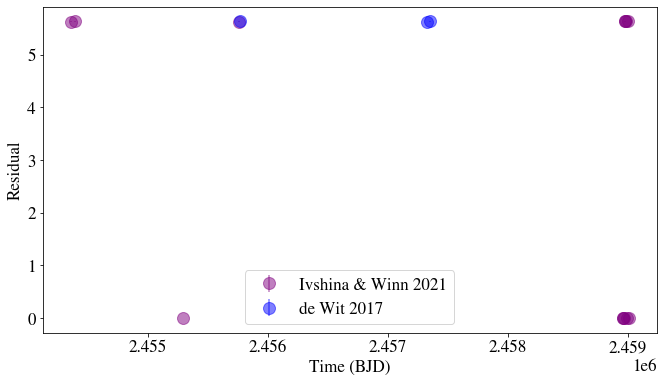

In [21]:
# plot all transit times

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
ax = axes
ax.errorbar(ttv_data["T_mid"], (ttv_data["T_mid"]-T0_ivshina)%P_ivshina, yerr= ttv_data["Uncertainty (days)"], 
            fmt = 'o',markersize=12, alpha = 0.5, color="purple", label="Ivshina & Winn 2021")
ax.errorbar(Spitzer_transits["T_mid"], (Spitzer_transits["T_mid"]-T0_ivshina)%P_ivshina, yerr= Spitzer_transits["Eclipse Uncertainty"], 
            fmt = 'o',markersize=12, alpha = 0.5, color="blue", label="de Wit 2017")
ax.set_ylabel("Residual")
ax.set_xlabel("Time (BJD)")
ax.legend()

In [22]:
ttv_data['Expected T_mid']=ttv_data["Orbit number"]*P_ivshina+T0_ivshina#ttv_data['T_mid'][3]

In [23]:
ttv_data['TTV (days)']=(ttv_data['Expected T_mid']-ttv_data["T_mid"])#*24*60
ttv_data['TTV (minutes)']=(ttv_data['Expected T_mid']-ttv_data["T_mid"])*24*60

In [24]:
ttv_data["Uncertainty (minutes)"] = ttv_data["Uncertainty (days)"]*24*60

# add column with instruments
instrument_np = np.array(["Spitzer", "HATNet", "Spitzer", "Spitzer",
                         "TESS", "TESS", "TESS","TESS", "TESS", "TESS",
                         "TESS", "TESS", "TESS"])
ttv_data["Instrument"] = instrument_np
ttv_data_TESS_only = ttv_data[ttv_data["Instrument"]=="TESS"].reset_index(drop=True)
ttv_data

ttv_data_Spitzer = ttv_data[ttv_data["Instrument"]=="Spitzer"]
ttv_data_HATNet = ttv_data[ttv_data["Instrument"]=="HATNet"]

ttv_data

,System,Orbit number,T_mid,Uncertainty (days),Time System,#,Reference,Expected T_mid,TTV (days),TTV (minutes),Uncertainty (minutes),Instrument
0,HAT-P-02,-249,2.454354e+06,0.001200,BJD_TDB,1,2013ApJ...766...95L,2.454354e+06,0.001319,1.899240,1.728000,Spitzer
1,HAT-P-02,-243,2.454387e+06,0.000740,BJD,>1,2010MNRAS.401.2665P,2.454387e+06,0.000227,0.326326,1.065600,HATNet
2,HAT-P-02,-83,2.455289e+06,0.000600,BJD_TDB,1,2013ApJ...766...95L,2.455289e+06,-0.001535,-2.210056,0.864000,Spitzer
3,HAT-P-02,0,2.455756e+06,0.000670,BJD_TDB,1,2013ApJ...766...95L,2.455756e+06,0.001123,1.617696,0.964800,Spitzer
4,HAT-P-02,568,2.458956e+06,0.000429,BJD_TDB,1,This work,2.458956e+06,-0.000344,-0.496058,0.617616,TESS
5,HAT-P-02,569,2.458962e+06,0.000377,BJD_TDB,1,This work,2.458962e+06,-0.000045,-0.064610,0.543456,TESS
6,HAT-P-02,570,2.458968e+06,0.000420,BJD_TDB,1,This work,2.458968e+06,-0.000425,-0.612362,0.604512,TESS
7,HAT-P-02,571,2.458973e+06,0.000346,BJD_TDB,1,This work,2.458973e+06,0.000474,0.683085,0.498240,TESS
8,HAT-P-02,572,2.458979e+06,0.000305,BJD_TDB,1,This work,2.458979e+06,0.000344,0.495332,0.439200,TESS
9,HAT-P-02,573,2.458984e+06,0.000494,BJD_TDB,1,This work,2.458984e+06,0.000224,0.321980,0.711504,TESS


In [25]:
ttv_data["T_mid"][0]

2454353.69184

In [26]:
np.abs(ttv_data["TTV (minutes)"])

0     1.899240
1     0.326326
2     2.210056
3     1.617696
4     0.496058
5     0.064610
6     0.612362
7     0.683085
8     0.495332
9     0.321980
10    0.384173
11    0.190723
12    0.169829
Name: TTV (minutes), dtype: float64

(-5.0, 5.0)

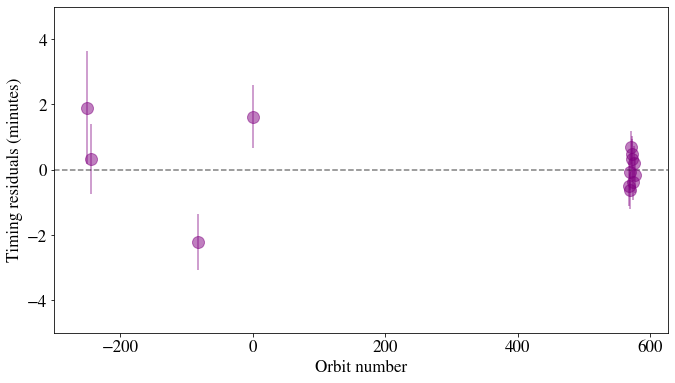

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
plt.errorbar(ttv_data["Orbit number"], ttv_data["TTV (minutes)"],yerr= ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, markersize=5)
plt.xlabel("Orbit number")
plt.ylabel("Timing residuals (minutes)")
plt.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(-5, 5)


(567.0, 578.0)

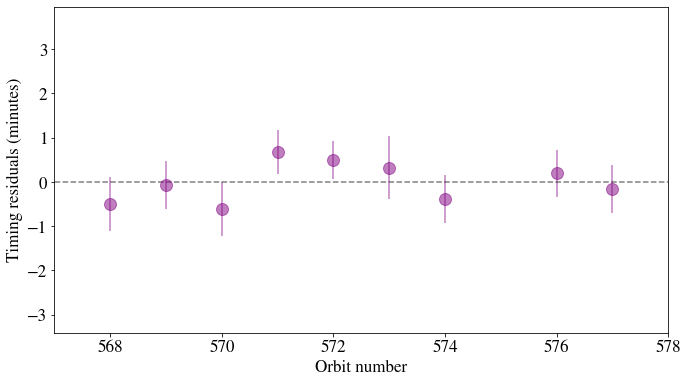

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
plt.errorbar(ttv_data["Orbit number"], ttv_data["TTV (minutes)"],yerr= ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, markersize=5)
plt.xlabel("Orbit number")
plt.ylabel("Timing residuals (minutes)")
plt.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
plt.xlim(567, 578)


(-1.3, 1.3)

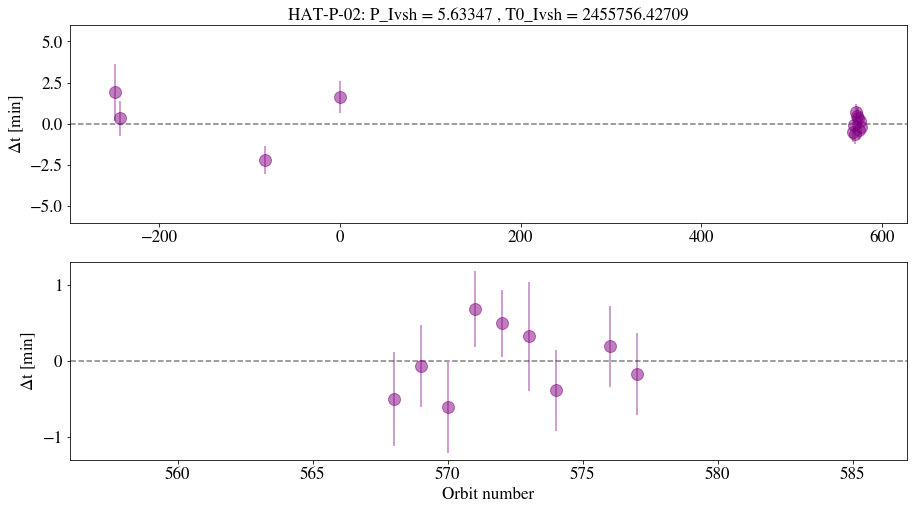

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = axes[0]
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
ax.errorbar(ttv_data["Orbit number"], ttv_data["TTV (minutes)"],yerr= ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, label=
#ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin, xmax)
ax.set_ylim(-6, 6)
#ax.legend(loc="upper left")
ax.set_title("HAT-P-02: P_Ivsh = %.5f , T0_Ivsh = %.5f" %(P_ivshina,T0_ivshina), 
             size=17)

ax = axes[1]
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
ax.errorbar(ttv_data["Orbit number"], ttv_data["TTV (minutes)"],yerr= ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, label="P_mcmc = %.5f +/- %.3e, T_mcmc = %.5f +/- %.3e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc))#, markersize=5)
ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(556, 587)#xmin, xmax)
ax.set_ylim(-1.3, 1.3)
#plt.legend(loc="upper left")


In [30]:
Spitzer_transits["TTV (minutes)"]

0    0.192096
1    1.867886
2    0.597924
Name: TTV (minutes), dtype: float64

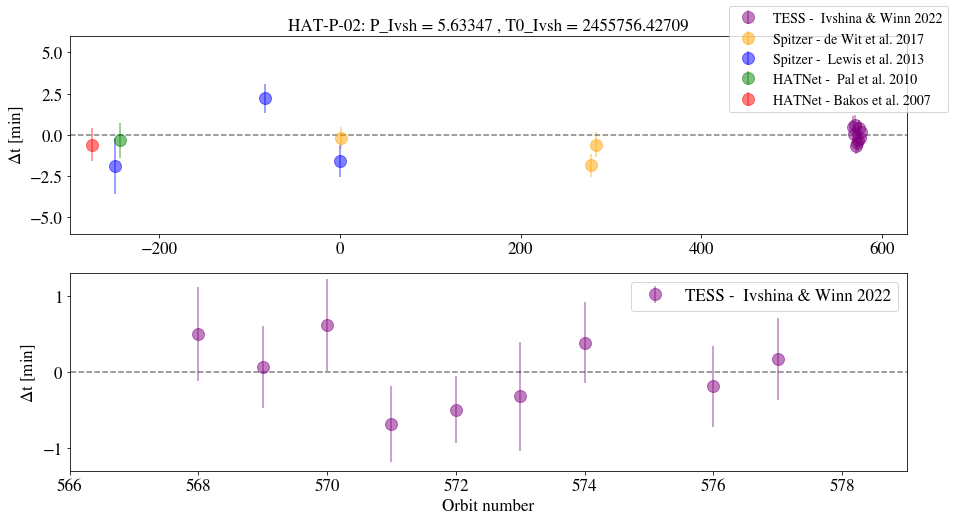

In [31]:
# Add spitzer times
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = axes[0]
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
ax.errorbar(ttv_data_TESS_only["Orbit number"], -ttv_data_TESS_only["TTV (minutes)"],yerr= ttv_data_TESS_only["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple", label="TESS -  Ivshina & Winn 2022")
ax.errorbar(Spitzer_transits["Orbit number"], -Spitzer_transits["TTV (minutes)"],yerr= Spitzer_transits["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="orange", label="Spitzer - de Wit et al. 2017")
ax.errorbar(ttv_data_Spitzer["Orbit number"], -ttv_data_Spitzer["TTV (minutes)"],yerr= ttv_data_Spitzer["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="blue", label="Spitzer -  Lewis et al. 2013")
ax.errorbar(ttv_data_HATNet["Orbit number"], -ttv_data_HATNet["TTV (minutes)"],yerr= ttv_data_HATNet["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="g", label="HATNet -  Pal et al. 2010")
ax.errorbar(Bakos_transit["Orbit Number"], -Bakos_transit["TTV (minutes)"],yerr= Bakos_transit["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="r", label="HATNet - Bakos et al. 2007")

#ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin, xmax)
ax.set_ylim(-6, 6)
ax.legend(bbox_to_anchor=(1.05, 1.15), loc="upper right", prop={'size': 14}, borderaxespad=0)
ax.set_title("HAT-P-02: P_Ivsh = %.5f , T0_Ivsh = %.5f" %(P_ivshina,T0_ivshina), 
             size=17)

ax = axes[1]
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
ax.errorbar(ttv_data["Orbit number"], -ttv_data["TTV (minutes)"],yerr= ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple",label="TESS -  Ivshina & Winn 2022")
ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(566, 579)#xmin, xmax)
ax.set_ylim(-1.3, 1.3)
plt.legend(loc="upper right")

In [32]:
print(Bakos_transit["Orbit Number"][0])
print(np.max(ttv_data["Orbit number"]))
print(time_bjd_isot(np.max(ttv_data["T_mid"])))
(np.max(ttv_data["Orbit number"])-Bakos_transit["Orbit Number"][0])*P_ivshina/365

-274
577
2020-06-06T22:32:25.152


13.134472996044932

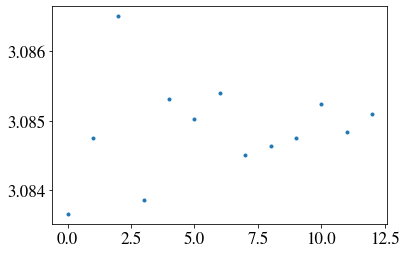

In [33]:
plt.plot(ttv_data["T_mid"]%P_ivshina, ".")

# Perform an EDMCMC fit on Transit times (from Ivshina & Winn only)

In [34]:
import edmcmc as edm
import corner
import time

In [35]:
orbit_num_np = np.array(ttv_data["Orbit number"])
T_mid_np = np.array(ttv_data["T_mid"])
T_mid_err_np = np.array(ttv_data["Uncertainty (days)"])

In [36]:
def loglikelihood(theta, orbit_num, y, yerr):
    T0, Period = theta
    model = orbit_num*Period+T0
    sigma2 = yerr**2
    chisq = np.sum((y - model)**2 / sigma2) 
    
    #loglikelihood =  -0.5 *np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))#* chisq / sigma2 + np.log(sigma2))
    
    newsig = np.sqrt(sigma2)
    
    negloglikelihood = np.sum(0.5 * (y - model)**2 / (newsig)**2 + np.log(newsig))
    #print(loglikelihood)
    return -1*negloglikelihood

In [37]:
def chisq(theta, t, y, yerr):
    T0, Period = theta
    model = orbit_num*Period+T0
    sigma2 = yerr**2 
    chisq = np.sum((y - model)**2 / sigma2) 
    return chisq

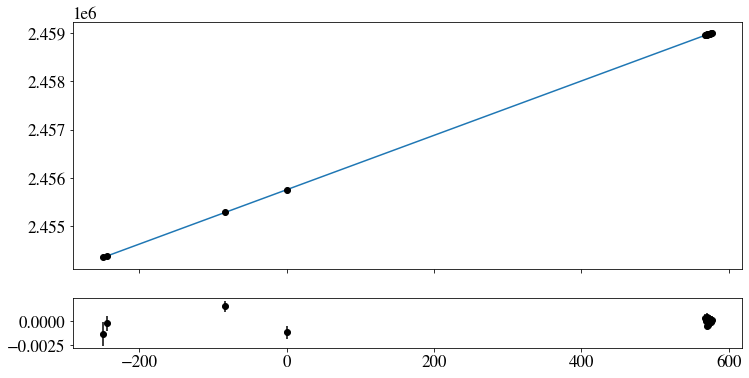

In [38]:
T0_Ivshina = 2455756.4270934
P_Ivshina = 5.6334696164  
orbits_ti = np.arange(np.min(ttv_data["Orbit number"]), np.max(ttv_data["Orbit number"]), 1)

def expected_transit_times(theta, orbit_num):
    T0, Period = theta
    return orbit_num*Period+T0

data = {"Orbit number": orbits_ti,
       'T_mid': expected_transit_times(np.array([T0_Ivshina, P_Ivshina]), orbits_ti)}
df_ti = pd.DataFrame(data=data)

timing_preds = expected_transit_times(np.array([T0_Ivshina, P_Ivshina]), ttv_data["Orbit number"])

fig, axes = plt.subplots(2,1, figsize=(12, 6),  sharex=True,  gridspec_kw={'height_ratios': [3, 0.6]})

ax = axes[0]
ax.errorbar(ttv_data["Orbit number"], ttv_data["T_mid"],yerr=ttv_data["Uncertainty (days)"], fmt = 'o', color='k')
ax.plot(df_ti['Orbit number'], df_ti['T_mid'])

ax = axes[1]
ax.errorbar(ttv_data["Orbit number"], ttv_data["T_mid"]-timing_preds,yerr=ttv_data["Uncertainty (days)"], fmt = 'o', color='k')


solnx = np.array([T0_Ivshina, P_Ivshina])


In [39]:
def log_prior(theta):
    T0, Period = theta
    if 5.0<Period<6.0:
        return 0.0
    return -np.inf

In [40]:
def log_probability(theta, orbit_num, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglikelihood(theta, orbit_num, y, yerr)

In [41]:
width = np.array([15,5e-5])#[2e2, 2, 0.1, 0.05, 3, 0.25, 0.21]

out = edm.edmcmc(log_probability, solnx, width,
             args=(orbit_num_np,T_mid_np,T_mid_err_np), nwalkers=200, nlink = 40000, nburnin=5000)
print(np.median(out.flatchains[:,0]), '+/-', np.std(out.flatchains[:,0]), ';    ', np.median(out.flatchains[:,1]), '+/-', np.std(out.flatchains[:,1]))


/Users/zdebeurs/opt/anaconda3/lib/python3.9/site-packages/edmcmc.py:276: RuntimeWarning: overflow encountered in exp
  qs = np.exp(lastneglogl - theseneglogls)


0 days, 00:00:00.0 remains. Link 40000 of 40000. Acceptance rate = 0.35
2455756.427129845 +/- 0.11218985437143325 ;     5.633469487400978 +/- 1.1290032076014884e-05


In [42]:
np.shape(out.flatchains)

(7000000, 2)

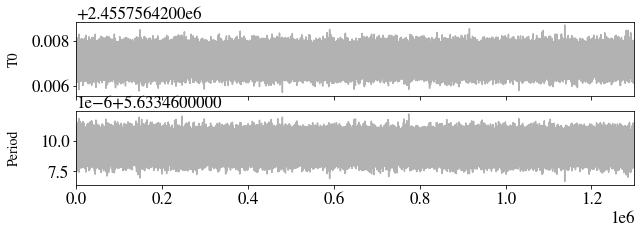

In [43]:
fig, axes = plt.subplots(len(solnx), figsize=(10, 1.5*len(solnx)), sharex=True)
samples = out.flatchains[5700000:,]
labels = ["T0", "Period"]
for i in range(len(labels)):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], size=14)
    ax.yaxis.set_label_coords(-0.1, 0.5)

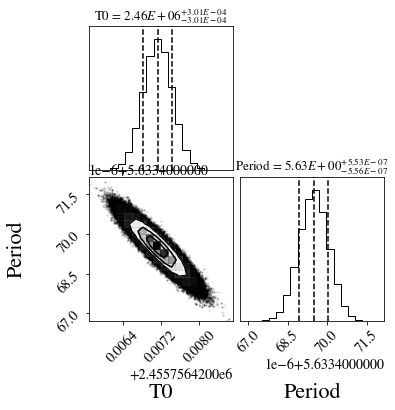

In [44]:
# global variable - set font-size to 14
plt.rcParams['font.size'] =14

# plot corner plot
fig = corner.corner(
    out.flatchains[5700000:,],
    labels=labels,
    quantiles=[0.159, 0.5, 0.841],
    show_titles=True,
    title_fmt=".2E",
    title_kwargs=dict(fontsize=13),
    label_kwargs=dict(fontsize=22),
    labelpad = 0.13)

#fig.suptitle(eval_method, fontsize=25)

# revert global font-size to 17
plt.rcParams['font.size'] =17

In [45]:
flat_samples = out.get_chains(nthin =5, nburnin = 1500, flat=True)

from IPython.display import display, Math

for i in range(len(labels)):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.8e}_{{-{1:.5e}}}^{{{2:.5e}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [46]:
T0_mcmc = np.percentile(flat_samples[:, 0], [50])[0]
T0_sig_mcmc = np.max(np.diff(np.percentile(flat_samples[:, 0], [16, 50, 84])))
Period_mcmc = np.percentile(flat_samples[:, 1], [50])[0]
Period_sig_mcmc = np.max(np.diff(np.percentile(flat_samples[:, 1], [16, 50, 84])))

T_mid_expected_mcmc = expected_transit_times(np.array([T0_mcmc, Period_mcmc]), orbit_num_np)

In [47]:
# create pandas dataframe based on these fits

edmcmc_ttv_data = ttv_data
edmcmc_ttv_data['T_mid_expected_mcmc'] = T_mid_expected_mcmc
edmcmc_ttv_data['TTV (days)'] = edmcmc_ttv_data['T_mid']- edmcmc_ttv_data['T_mid_expected_mcmc']
edmcmc_ttv_data["TTV (minutes)"] = edmcmc_ttv_data['TTV (days)']*24*60 
edmcmc_ttv_data["Uncertainty (minutes)"] = edmcmc_ttv_data["Uncertainty (days)"]*24*60 

edmcmc_ttv_data

,System,Orbit number,T_mid,Uncertainty (days),Time System,#,Reference,Expected T_mid,TTV (days),TTV (minutes),Uncertainty (minutes),Instrument,T_mid_expected_mcmc
0,HAT-P-02,-249,2.454354e+06,0.001200,BJD_TDB,1,2013ApJ...766...95L,2.454354e+06,-0.001388,-1.998541,1.728000,Spitzer,2.454354e+06
1,HAT-P-02,-243,2.454387e+06,0.000740,BJD,>1,2010MNRAS.401.2665P,2.454387e+06,-0.000295,-0.424507,1.065600,HATNet,2.454387e+06
2,HAT-P-02,-83,2.455289e+06,0.000600,BJD_TDB,1,2013ApJ...766...95L,2.455289e+06,0.001487,2.141726,0.864000,Spitzer,2.455289e+06
3,HAT-P-02,0,2.455756e+06,0.000670,BJD_TDB,1,2013ApJ...766...95L,2.455756e+06,-0.001160,-1.670540,0.964800,Spitzer,2.455756e+06
4,HAT-P-02,568,2.458956e+06,0.000429,BJD_TDB,1,This work,2.458956e+06,0.000381,0.549186,0.617616,TESS,2.458956e+06
5,HAT-P-02,569,2.458962e+06,0.000377,BJD_TDB,1,This work,2.458962e+06,0.000082,0.117926,0.543456,TESS,2.458962e+06
6,HAT-P-02,570,2.458968e+06,0.000420,BJD_TDB,1,This work,2.458968e+06,0.000462,0.665864,0.604512,TESS,2.458968e+06
7,HAT-P-02,571,2.458973e+06,0.000346,BJD_TDB,1,This work,2.458973e+06,-0.000437,-0.629396,0.498240,TESS,2.458973e+06
8,HAT-P-02,572,2.458979e+06,0.000305,BJD_TDB,1,This work,2.458979e+06,-0.000307,-0.441457,0.439200,TESS,2.458979e+06
9,HAT-P-02,573,2.458984e+06,0.000494,BJD_TDB,1,This work,2.458984e+06,-0.000186,-0.267918,0.711504,TESS,2.458984e+06


(-1.3, 1.3)

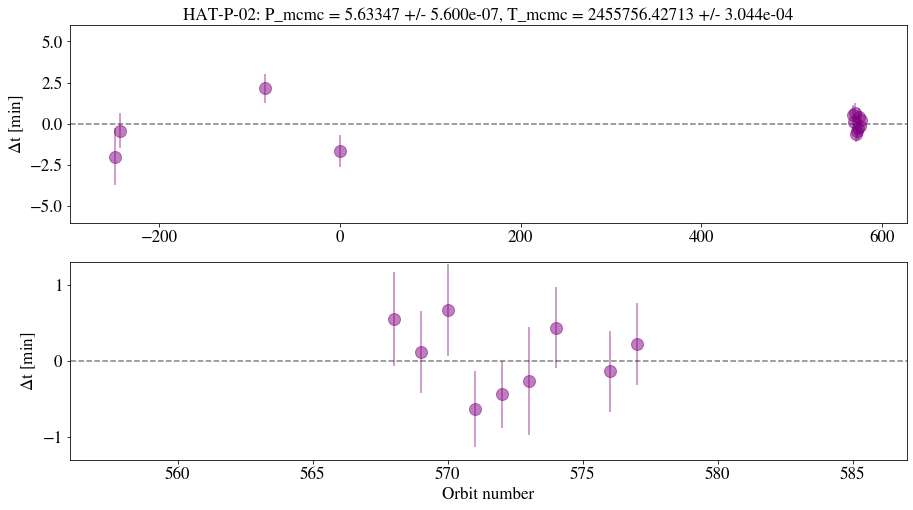

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = axes[0]
xmin = np.min(edmcmc_ttv_data["Orbit number"])-50
xmax =  np.max(edmcmc_ttv_data["Orbit number"])+50
ax.errorbar(edmcmc_ttv_data["Orbit number"], edmcmc_ttv_data["TTV (minutes)"],yerr= edmcmc_ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, label=
#ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin, xmax)
ax.set_ylim(-6, 6)
#ax.legend(loc="upper left")
ax.set_title("HAT-P-02: P_mcmc = %.5f +/- %.3e, T_mcmc = %.5f +/- %.3e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc), 
             size=17)

ax = axes[1]
xmin = np.min(edmcmc_ttv_data["Orbit number"])-50
xmax =  np.max(edmcmc_ttv_data["Orbit number"])+50
ax.errorbar(edmcmc_ttv_data["Orbit number"], edmcmc_ttv_data["TTV (minutes)"],yerr= edmcmc_ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, label="P_mcmc = %.5f +/- %.3e, T_mcmc = %.5f +/- %.3e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc))#, markersize=5)
ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(556, 587)#xmin, xmax)
ax.set_ylim(-1.3, 1.3)
#plt.legend(loc="upper left")




(567.0, 578.0)

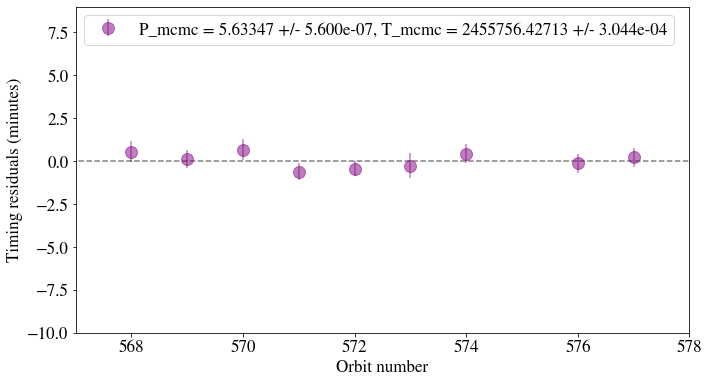

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11,6))
xmin = np.min(edmcmc_ttv_data["Orbit number"])-50
xmax =  np.max(edmcmc_ttv_data["Orbit number"])+50
plt.errorbar(edmcmc_ttv_data["Orbit number"], edmcmc_ttv_data["TTV (minutes)"],yerr= edmcmc_ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple", label="P_mcmc = %.5f +/- %.3e, T_mcmc = %.5f +/- %.3e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc))#, markersize=5)
plt.xlabel("Orbit number")
plt.ylabel("Timing residuals (minutes)")
plt.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(-10, 9)
plt.legend(loc="upper left")

plt.xlim(567, 578)

# Perform an EDMCMC fit on Transit times (Using both Ivshina & Winn and Spitzer times)

In [51]:
# create a dataframe that includes observations from both Spitzer & TESS
instrument_np = np.array(["Spitzer", "HATNet", "Spitzer", "Spitzer",
                         "TESS", "TESS", "TESS","TESS", "TESS", "TESS",
                         "TESS", "TESS", "TESS", "Spitzer2017", "Spitzer2017", "Spitzer2017"])
ttv_orbit_num = np.array(ttv_data["Orbit number"])
spitzer_orbit_num = np.array(Spitzer_transits["Orbit number"])
orbit_num_np = np.concatenate((ttv_orbit_num, spitzer_orbit_num), axis=None)

ttv_T_mid = np.array(ttv_data["T_mid"])
spitzer_T_mid = np.array(Spitzer_transits["T_mid"])
T_mid_np = np.concatenate((ttv_T_mid, spitzer_T_mid), axis=None)

ttv_uncertainty = np.array(ttv_data["Uncertainty (days)"])
spitzer_uncertainty = np.array(Spitzer_transits["Eclipse Uncertainty"])
uncertainty_np = np.concatenate((ttv_uncertainty, spitzer_uncertainty), axis=None)


combined_data = {'Instrument': instrument_np,
                'Orbit number': orbit_num_np,
                'T_mid':T_mid_np,
                'Uncertainty (days)':uncertainty_np,
                }
combined_data

{'Instrument': array(['Spitzer', 'HATNet', 'Spitzer', 'Spitzer', 'TESS', 'TESS', 'TESS',
        'TESS', 'TESS', 'TESS', 'TESS', 'TESS', 'TESS', 'Spitzer2017',
        'Spitzer2017', 'Spitzer2017'], dtype='<U11'),
 'Orbit number': array([-249., -243.,  -83.,    0.,  568.,  569.,  570.,  571.,  572.,
         573.,  574.,  576.,  577.,    1.,  278.,  283.]),
 'T_mid': array([2454353.69184   , 2454387.49375   , 2455288.85065   ,
        2455756.42597   , 2458956.23818   , 2458961.87135   ,
        2458967.5052    , 2458973.13777   , 2458978.77137   ,
        2458984.40496   , 2458990.03892   , 2459001.30546   ,
        2459006.93918   , 2455762.06042962, 2457322.53034962,
        2457350.69857962]),
 'Uncertainty (days)': array([0.0012   , 0.00074  , 0.0006   , 0.00067  , 0.0004289, 0.0003774,
        0.0004198, 0.000346 , 0.000305 , 0.0004941, 0.0003707, 0.0003712,
        0.0003758, 0.00047  , 0.00047  , 0.00051  ])}

In [52]:
import edmcmc as edm
import corner
import time

In [53]:
orbit_num_np = combined_data["Orbit number"]
T_mid_np = combined_data["T_mid"]
T_mid_err_np = combined_data["Uncertainty (days)"]

In [54]:
def loglikelihood(theta, orbit_num, y, yerr):
    T0, Period = theta
    model = orbit_num*Period+T0
    sigma2 = yerr**2
    chisq = np.sum((y - model)**2 / sigma2) 
    
    #loglikelihood =  -0.5 *np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))#* chisq / sigma2 + np.log(sigma2))
    
    newsig = np.sqrt(sigma2)
    
    negloglikelihood = np.sum(0.5 * (y - model)**2 / (newsig)**2 + np.log(newsig))
    #print(loglikelihood)
    return -1*negloglikelihood

In [55]:
def chisq(theta, t, y, yerr):
    T0, Period = theta
    model = orbit_num*Period+T0
    sigma2 = yerr**2 
    chisq = np.sum((y - model)**2 / sigma2) 
    return chisq

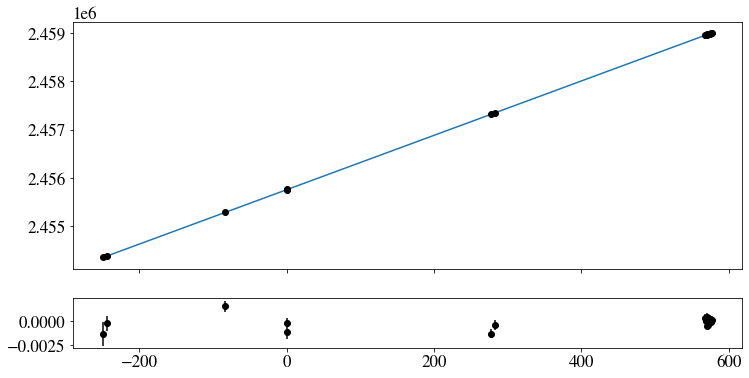

In [56]:
T0_Ivshina = 2455756.4270934
P_Ivshina = 5.6334696164  
orbits_ti = np.arange(np.min(combined_data["Orbit number"]), np.max(combined_data["Orbit number"]), 1)

def expected_transit_times(theta, orbit_num):
    T0, Period = theta
    return orbit_num*Period+T0

data = {"Orbit number": orbits_ti,
       'T_mid': expected_transit_times(np.array([T0_Ivshina, P_Ivshina]), orbits_ti)}
df_ti = pd.DataFrame(data=data)

timing_preds = expected_transit_times(np.array([T0_Ivshina, P_Ivshina]), combined_data["Orbit number"])

fig, axes = plt.subplots(2,1, figsize=(12, 6),  sharex=True,  gridspec_kw={'height_ratios': [3, 0.6]})

ax = axes[0]
ax.errorbar(combined_data["Orbit number"], combined_data["T_mid"],yerr=combined_data["Uncertainty (days)"], fmt = 'o', color='k')
ax.plot(df_ti['Orbit number'], df_ti['T_mid'])

ax = axes[1]
ax.errorbar(combined_data["Orbit number"], combined_data["T_mid"]-timing_preds,yerr=combined_data["Uncertainty (days)"], fmt = 'o', color='k')


solnx = np.array([T0_Ivshina, P_Ivshina])

In [57]:
def log_prior(theta):
    T0, Period = theta
    if 5.0<Period<6.0:
        return 0.0
    return -np.inf

In [58]:
def log_probability(theta, orbit_num, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglikelihood(theta, orbit_num, y, yerr)

In [59]:
width = np.array([15,5e-5])#[2e2, 2, 0.1, 0.05, 3, 0.25, 0.21]

out = edm.edmcmc(log_probability, solnx, width,
             args=(orbit_num_np,T_mid_np,T_mid_err_np), nwalkers=200, nlink = 40000, nburnin=5000)
print(np.median(out.flatchains[:,0]), '+/-', np.std(out.flatchains[:,0]), ';    ', np.median(out.flatchains[:,1]), '+/-', np.std(out.flatchains[:,1]))


/Users/zdebeurs/opt/anaconda3/lib/python3.9/site-packages/edmcmc.py:276: RuntimeWarning: overflow encountered in exp
  qs = np.exp(lastneglogl - theseneglogls)


0 days, 00:00:00.0 remains. Link 40000 of 40000. Acceptance rate = 0.35
2455756.426870558 +/- 0.040067394284208795 ;     5.633469850290284 +/- 3.467610745387539e-05


In [60]:
np.shape(out.flatchains)



(7000000, 2)

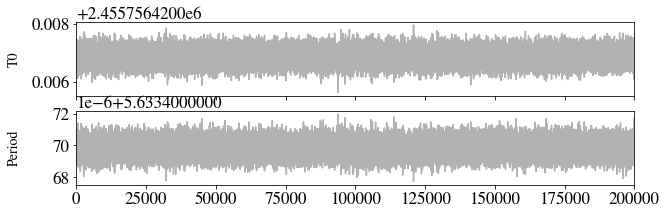

In [61]:
fig, axes = plt.subplots(len(solnx), figsize=(10, 1.5*len(solnx)), sharex=True)
samples = out.flatchains[6800000:,]
labels = ["T0", "Period"]
for i in range(len(labels)):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], size=14)
    ax.yaxis.set_label_coords(-0.1, 0.5)

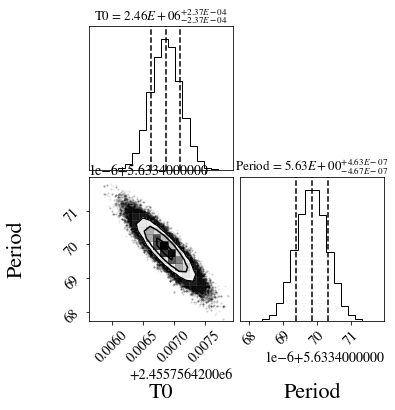

In [62]:
# global variable - set font-size to 14
plt.rcParams['font.size'] =14

# plot corner plot
fig = corner.corner(
    out.flatchains[6800000:,],
    labels=labels,
    quantiles=[0.159, 0.5, 0.841],
    show_titles=True,
    title_fmt=".2E",
    title_kwargs=dict(fontsize=13),
    label_kwargs=dict(fontsize=22),
    labelpad = 0.13)

#fig.suptitle(eval_method, fontsize=25)

# revert global font-size to 17
plt.rcParams['font.size'] =17

In [63]:
flat_samples = out.get_chains(nthin =5, nburnin = 1500, flat=True)

from IPython.display import display, Math

for i in range(len(labels)):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.8e}_{{-{1:.5e}}}^{{{2:.5e}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [64]:
T0_mcmc = np.percentile(flat_samples[:, 0], [50])[0]
T0_sig_mcmc = np.max(np.diff(np.percentile(flat_samples[:, 0], [16, 50, 84])))
Period_mcmc = np.percentile(flat_samples[:, 1], [50])[0]
Period_sig_mcmc = np.max(np.diff(np.percentile(flat_samples[:, 1], [16, 50, 84])))

T_mid_expected_mcmc = expected_transit_times(np.array([T0_mcmc, Period_mcmc]), orbit_num_np)

In [77]:
# create pandas dataframe based on these fits

edmcmc_ttv_data = {'T_mid_expected_mcmc': T_mid_expected_mcmc}
edmcmc_ttv_data= {'Instrument':combined_data["Instrument"],
                  'Orbit number': combined_data['Orbit number'],
                  'transit_time': combined_data['T_mid'],
                  'T_mid_expected_mcmc': T_mid_expected_mcmc,
                  'TTV (days)': combined_data['T_mid']- T_mid_expected_mcmc,
                  "TTV (minutes)": (combined_data['T_mid']- T_mid_expected_mcmc)*24*60 ,
                  "Uncertainty (days)": combined_data["Uncertainty (days)"],
                  "Uncertainty (minutes)": combined_data["Uncertainty (days)"]*24*60 }

edmcmc_ttv_df = pd.DataFrame(data = edmcmc_ttv_data)
edmcmc_ttv_df

# make a subset 
edmcmc_spitz_df = edmcmc_ttv_df[edmcmc_ttv_df['Instrument'] =='Spitzer']
edmcmc_TESS_df = edmcmc_ttv_df[edmcmc_ttv_df['Instrument'] =='TESS']
edmcmc_hatnet_df = edmcmc_ttv_df[edmcmc_ttv_df['Instrument'] =='HATNet']
edmcmc_spitz2017_df = edmcmc_ttv_df[edmcmc_ttv_df['Instrument'] =='Spitzer2017']

edmcmc_ttv_df

,Instrument,Orbit number,transit_time,T_mid_expected_mcmc,TTV (days),TTV (minutes),Uncertainty (days),Uncertainty (minutes)
0,Spitzer,-249.0,2.454354e+06,2.454354e+06,-0.001037,-1.493785,0.001200,1.728000
1,HATNet,-243.0,2.454387e+06,2.454387e+06,0.000054,0.077103,0.000740,1.065600
2,Spitzer,-83.0,2.455289e+06,2.455289e+06,0.001777,2.559445,0.000600,0.864000
3,Spitzer,0.0,2.455756e+06,2.455756e+06,-0.000900,-1.296340,0.000670,0.964800
4,TESS,568.0,2.458956e+06,2.458956e+06,0.000434,0.625573,0.000429,0.617616
5,TESS,569.0,2.458962e+06,2.458962e+06,0.000135,0.193788,0.000377,0.543456
6,TESS,570.0,2.458968e+06,2.458968e+06,0.000515,0.741202,0.000420,0.604512
7,TESS,571.0,2.458973e+06,2.458973e+06,-0.000385,-0.554583,0.000346,0.498240
8,TESS,572.0,2.458979e+06,2.458979e+06,-0.000255,-0.367168,0.000305,0.439200
9,TESS,573.0,2.458984e+06,2.458984e+06,-0.000135,-0.194154,0.000494,0.711504


In [78]:
# write transit times to csv

edmcmc_ttv_df.to_csv("../HAT-p2-b/Data/transit_times_combined.csv")

(556.0, 587.0)

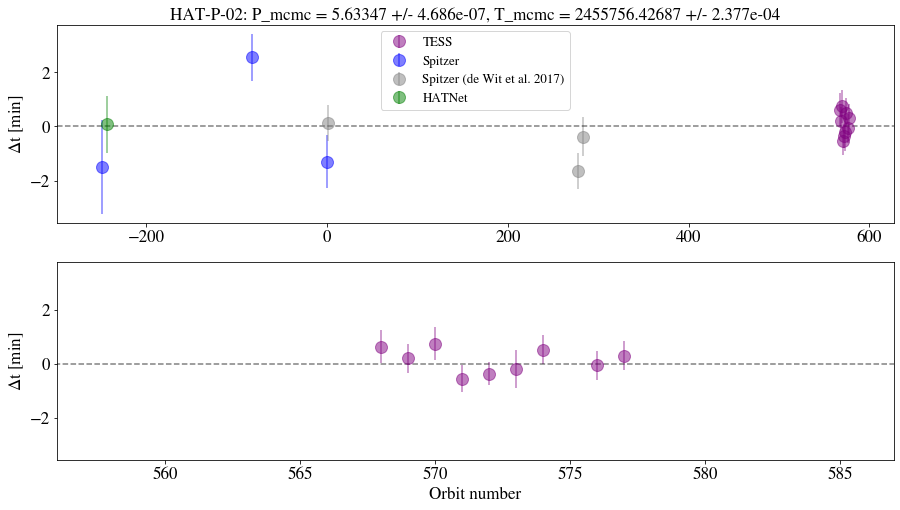

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = axes[0]
xmin = np.min(edmcmc_ttv_df["Orbit number"])-50
xmax =  np.max(edmcmc_ttv_df["Orbit number"])+50
ax.errorbar(edmcmc_TESS_df["Orbit number"], edmcmc_TESS_df["TTV (minutes)"],yerr= edmcmc_TESS_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color='purple', label="TESS")
ax.errorbar(edmcmc_spitz_df["Orbit number"], edmcmc_spitz_df["TTV (minutes)"],yerr= edmcmc_spitz_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color='blue', label="Spitzer")
ax.errorbar(edmcmc_spitz2017_df["Orbit number"], edmcmc_spitz2017_df["TTV (minutes)"],yerr= edmcmc_spitz2017_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color='grey', label="Spitzer (de Wit et al. 2017)")
ax.errorbar(edmcmc_hatnet_df["Orbit number"], edmcmc_hatnet_df["TTV (minutes)"],yerr= edmcmc_hatnet_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color='green', label="HATNet")

#ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin, xmax)
#ax.set_ylim(-6, 6)
ax.legend(prop={'size': 13},loc="upper center")
ax.set_title("HAT-P-02: P_mcmc = %.5f +/- %.3e, T_mcmc = %.5f +/- %.3e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc), 
             size=17)

ax = axes[1]
xmin = np.min(edmcmc_ttv_df["Orbit number"])-50
xmax =  np.max(edmcmc_ttv_df["Orbit number"])+50
ax.errorbar(edmcmc_ttv_df["Orbit number"], edmcmc_ttv_df["TTV (minutes)"],yerr= edmcmc_ttv_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, label="P_mcmc = %.5f +/- %.3e, T_mcmc = %.5f +/- %.3e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc))#, markersize=5)
ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(556, 587)#xmin, xmax)
#ax.set_ylim(-1.3, 1.3)
#plt.legend(loc="upper left")


In [67]:
Ben_ttv_posteriors = pd.read_csv("posteriors__full_dataset_ttvs.csv")


P_ben = Ben_ttv_posteriors[Ben_ttv_posteriors['Unnamed: 0'].str.contains('period')]["mean"]
T0_ben = Ben_ttv_posteriors[Ben_ttv_posteriors['Unnamed: 0'].str.contains("t0")]["mean"]

Ben_ttv_posteriors

,Unnamed: 0,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
0,mean,1.000029e+00,0.000026,9.999823e-01,1.000077e+00,8.359739e-07,5.913153e-07,973.425182,264.644156,1.007608
1,m_star,1.299610e+00,0.196259,9.503367e-01,1.678066e+00,6.652622e-03,5.102705e-03,864.239635,279.410127,1.004306
2,r_star,1.699561e+00,0.065417,1.580053e+00,1.826924e+00,9.663282e-04,6.847237e-04,4587.339321,3528.980076,1.004343
3,t0[0],2.458956e+06,0.000217,2.458956e+06,2.458956e+06,9.670876e-05,7.278422e-05,5023.997239,3624.246780,1.000969
4,period[0],5.633423e+00,0.000043,5.633341e+00,5.633498e+00,1.272229e-06,8.998892e-07,1152.165364,510.320549,1.003697
5,transit_times_0[0],2.458956e+06,0.000448,2.458956e+06,2.458956e+06,1.993909e-04,1.500909e-04,771.047228,1186.215854,1.012285
6,transit_times_0[1],2.458962e+06,0.000463,2.458962e+06,2.458962e+06,2.063266e-04,1.552842e-04,772.254094,1574.593290,1.012485
7,transit_times_0[2],2.458968e+06,0.000481,2.458968e+06,2.458968e+06,1.816354e-05,1.284890e-05,486.037203,241.128999,1.014186
8,transit_times_0[3],2.458973e+06,0.000506,2.458973e+06,2.458973e+06,2.251885e-04,1.695146e-04,478.233083,148.747057,1.013044
9,transit_times_0[4],2.458979e+06,0.000471,2.458979e+06,2.458979e+06,2.045060e-05,1.446870e-05,406.652774,176.106461,1.015957


In [68]:
list(Ben_ttv_posteriors[Ben_ttv_posteriors['Unnamed: 0'].str.contains('ttvs_0')]["mean"])

[7.073185173360389e-06,
 -1.3414487964054424e-05,
 0.0002784738854481,
 -0.0003539388410453,
 -0.0003176778019438,
 -0.000280906298502,
 0.0004898076309115,
 -0.0007503235869281,
 6.755873043013034e-05,
 0.000417984746369]

In [69]:
Ben_TESS_ttvs_data = {"T_mid": Ben_ttv_posteriors[Ben_ttv_posteriors['Unnamed: 0'].str.contains('transit_times_0')]["mean"],
                     'Uncertainty (days)': Ben_ttv_posteriors[Ben_ttv_posteriors['Unnamed: 0'].str.contains('transit_times_0')]["sd"],
                     'TTV (days)': list(Ben_ttv_posteriors[Ben_ttv_posteriors['Unnamed: 0'].str.contains('ttvs_0')]["mean"])}

Ben_TESS_ttvs = pd.DataFrame(data = Ben_TESS_ttvs_data)
Ben_TESS_ttvs["Orbit number"] = round((Ben_TESS_ttvs_data["T_mid"]-T0_ivshina)/P_ivshina)
Ben_TESS_ttvs["TTV (minutes)"] = np.array(Ben_TESS_ttvs_data["TTV (days)"])*24*60
Ben_TESS_ttvs["Uncertainty (minutes)"] = np.array(Ben_TESS_ttvs_data["Uncertainty (days)"])*24*60


In [70]:
Ben_ttv_posteriors[Ben_ttv_posteriors['Unnamed: 0'].str.contains('transit_times_0')]

,Unnamed: 0,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
5,transit_times_0[0],2.458956e+06,0.000448,2.458956e+06,2.458956e+06,0.000199,0.000150,771.047228,1186.215854,1.012285
6,transit_times_0[1],2.458962e+06,0.000463,2.458962e+06,2.458962e+06,0.000206,0.000155,772.254094,1574.593290,1.012485
7,transit_times_0[2],2.458968e+06,0.000481,2.458968e+06,2.458968e+06,0.000018,0.000013,486.037203,241.128999,1.014186
8,transit_times_0[3],2.458973e+06,0.000506,2.458973e+06,2.458973e+06,0.000225,0.000170,478.233083,148.747057,1.013044
9,transit_times_0[4],2.458979e+06,0.000471,2.458979e+06,2.458979e+06,0.000020,0.000014,406.652774,176.106461,1.015957
10,transit_times_0[5],2.458984e+06,0.000460,2.458984e+06,2.458984e+06,0.000205,0.000154,446.788715,270.547982,1.016568
11,transit_times_0[6],2.458990e+06,0.000459,2.458990e+06,2.458990e+06,0.000205,0.000154,545.333292,944.934982,1.009655
12,transit_times_0[7],2.458996e+06,0.000621,2.458996e+06,2.458996e+06,0.000277,0.000208,1535.251932,2155.298429,1.009692
13,transit_times_0[8],2.459001e+06,0.000461,2.459001e+06,2.459001e+06,0.000205,0.000155,657.265710,1224.240885,1.010695
14,transit_times_0[9],2.459007e+06,0.000454,2.459007e+06,2.459007e+06,0.000202,0.000152,553.669331,1019.618504,1.011408


In [71]:
Ben_TESS_ttvs

,T_mid,Uncertainty (days),TTV (days),Orbit number,TTV (minutes),Uncertainty (minutes)
5,2.458956e+06,0.000448,0.000007,568.0,0.010185,0.644588
6,2.458962e+06,0.000463,-0.000013,569.0,-0.019317,0.667019
7,2.458968e+06,0.000481,0.000278,570.0,0.401002,0.693159
8,2.458973e+06,0.000506,-0.000354,571.0,-0.509672,0.728099
9,2.458979e+06,0.000471,-0.000318,572.0,-0.457456,0.678657
10,2.458984e+06,0.000460,-0.000281,573.0,-0.404505,0.662978
11,2.458990e+06,0.000459,0.000490,574.0,0.705323,0.661318
12,2.458996e+06,0.000621,-0.000750,575.0,-1.080466,0.894543
13,2.459001e+06,0.000461,0.000068,576.0,0.097285,0.664048
14,2.459007e+06,0.000454,0.000418,577.0,0.601898,0.653216


In [72]:
# create a subset of the dataset that does not include the 8th transit (since Ivshina & Winn 2022 do not include this transit)
Ben_TESS_ttvs_not8 = Ben_TESS_ttvs.drop(index=12).reset_index(drop=True)


NameError: name 'uncertainty_propogated' is not defined

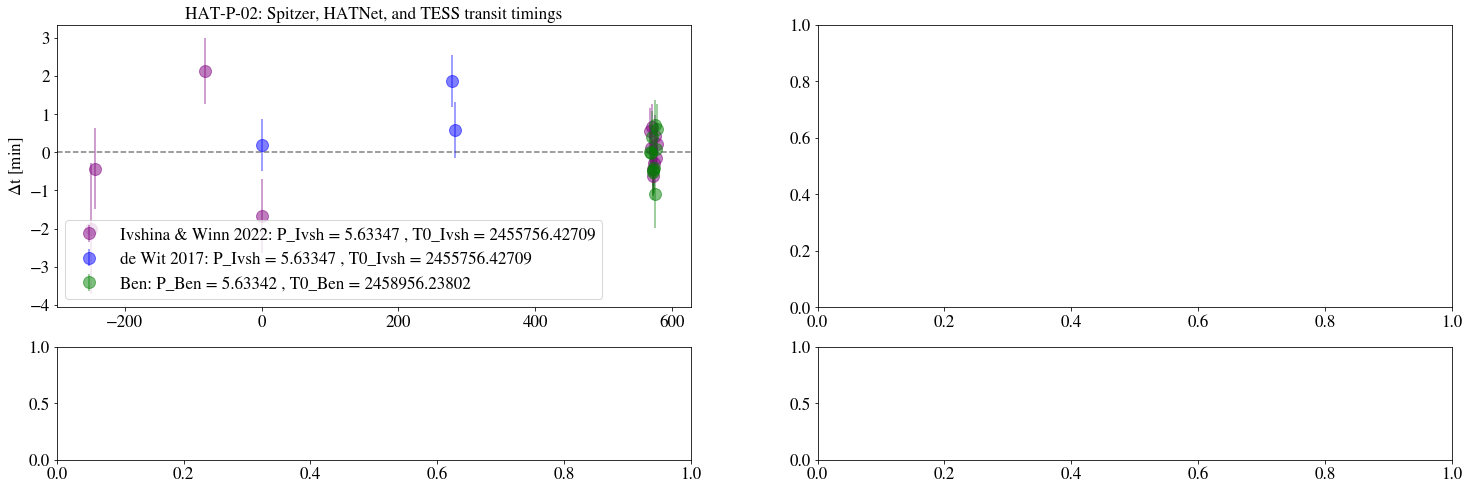

In [73]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,8),  gridspec_kw={'height_ratios': [3, 1.2]})
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = axes[0][0]
xmin1 = np.min(ttv_data["Orbit number"])-50
xmax1 =  np.max(ttv_data["Orbit number"])+50
ax.errorbar(ttv_data["Orbit number"], ttv_data["TTV (minutes)"],yerr= ttv_data["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple", label="Ivshina & Winn 2022: P_Ivsh = %.5f , T0_Ivsh = %.5f" %(P_ivshina,T0_ivshina))
ax.errorbar(Spitzer_transits["Orbit number"], Spitzer_transits["TTV (minutes)"],yerr= Spitzer_transits["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="blue", label="de Wit 2017: P_Ivsh = %.5f , T0_Ivsh = %.5f" %(P_ivshina,T0_ivshina))
ax.errorbar(Ben_TESS_ttvs["Orbit number"], Ben_TESS_ttvs["TTV (minutes)"],yerr= Ben_TESS_ttvs["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="green", label="Ben: P_Ben = %.5f , T0_Ben = %.5f" %(P_ben,T0_ben))
#ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin1, xmax = xmax1, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin1, xmax1)
#ax.set_ylim(-6, 6)
ax.legend(loc="lower left")
ax.set_title("HAT-P-02: Spitzer, HATNet, and TESS transit timings", 
             size=17)


ax = axes[1][0]
xmin = np.min(ttv_data["Orbit number"])-50
xmax =  np.max(ttv_data["Orbit number"])+50
ax.errorbar(ttv_data_TESS_only["Orbit number"], Ben_TESS_ttvs_not8["TTV (days)"]-ttv_data_TESS_only["TTV (days)"],yerr= uncertainty_propogated, 
             fmt = 'o',markersize=12, alpha = 0.5, color="grey", label="Residuals")
#ax.set_xlabel("Orbit number")
ax.set_ylabel("residuals [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin, xmax)
#ax.set_ylim(-6, 6)
#ax.legend(loc="upper left")

ax = axes[0][1]
xmin = np.min(ttv_data_TESS_only["Orbit number"])-5
xmax =  np.max(ttv_data_TESS_only["Orbit number"])+5
ax.errorbar(ttv_data_TESS_only["Orbit number"], ttv_data_TESS_only["TTV (minutes)"],yerr= ttv_data_TESS_only["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple", label="TESS Transits fit by Ivshina & Winn 2022")
ax.errorbar(Ben_TESS_ttvs["Orbit number"], -Ben_TESS_ttvs["TTV (minutes)"],yerr= Ben_TESS_ttvs["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="green", label="TESS transits fit by Ben")

#ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin, xmax)
#ax.set_ylim(-6, 6)
ax.legend(loc="upper left")
ax.set_title("HAT-P-02: TESS transit timings", 
             size=17)


ax = axes[1][1]
# propogate uncertainties 
uncertainty_propogated = np.sqrt((ttv_data_TESS_only["Uncertainty (minutes)"])**2+(Ben_TESS_ttvs_not8["Uncertainty (minutes)"])**2)

xmin = np.min(ttv_data_TESS_only["Orbit number"])-5
xmax =  np.max(ttv_data_TESS_only["Orbit number"])+5
ax.errorbar(ttv_data_TESS_only["Orbit number"], Ben_TESS_ttvs_not8["TTV (days)"]-ttv_data_TESS_only["TTV (days)"],yerr= uncertainty_propogated, 
             fmt = 'o',markersize=12, alpha = 0.5, color="grey", label="Residuals")
#ax.set_xlabel("Orbit number")
ax.set_ylabel("residuals [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin, xmax)
#ax.set_ylim(-6, 6)
#ax.legend(loc="upper left")


In [74]:
(Ben_TESS_ttvs_not8["TTV (days)"]-ttv_data_TESS_only["TTV (days)"])/0.8*100


0    0.043945
1    0.003932
2    0.087966
3   -0.103538
4   -0.082707
5   -0.063063
6    0.094574
7   -0.008111
8    0.066990
Name: TTV (days), dtype: float64

In [75]:
Ben_TESS_ttvs_not8 = Ben_TESS_ttvs.drop(index=12).reset_index(drop=True)
Ben_TESS_ttvs_not8["TTV (days)"]-ttv_data_TESS_only["TTV (days)"]

0    0.000352
1    0.000031
2    0.000704
3   -0.000828
4   -0.000662
5   -0.000505
6    0.000757
7   -0.000065
8    0.000536
Name: TTV (days), dtype: float64

In [76]:
edmcmc_ttv_df


,Instrument,Orbit number,T_mid_expected_mcmc,TTV (days),TTV (minutes),Uncertainty (days),Uncertainty (minutes)
0,Spitzer,-249.0,2.454354e+06,-0.001037,-1.493785,0.001200,1.728000
1,HATNet,-243.0,2.454387e+06,0.000054,0.077103,0.000740,1.065600
2,Spitzer,-83.0,2.455289e+06,0.001777,2.559445,0.000600,0.864000
3,Spitzer,0.0,2.455756e+06,-0.000900,-1.296340,0.000670,0.964800
4,TESS,568.0,2.458956e+06,0.000434,0.625573,0.000429,0.617616
5,TESS,569.0,2.458962e+06,0.000135,0.193788,0.000377,0.543456
6,TESS,570.0,2.458968e+06,0.000515,0.741202,0.000420,0.604512
7,TESS,571.0,2.458973e+06,-0.000385,-0.554583,0.000346,0.498240
8,TESS,572.0,2.458979e+06,-0.000255,-0.367168,0.000305,0.439200
9,TESS,573.0,2.458984e+06,-0.000135,-0.194154,0.000494,0.711504


# Perform an EDMCMC fit on Transit times (Using all the transit times)

In [120]:
# create a dataframe that includes observations from both Spitzer & TESS
instrument_np = np.array(["Spitzer", "HATNet", "Spitzer", "Spitzer",
                         "TESS", "TESS", "TESS","TESS", "TESS", "TESS",
                         "TESS", "TESS", "TESS", "Spitzer2017", 
                          "Spitzer2017", "Spitzer2017", "HATNet"])
ttv_orbit_num = np.array(ttv_data["Orbit number"])
spitzer_orbit_num = np.array(Spitzer_transits["Orbit number"])
hatnet_orbit_num = np.array(Bakos_transit["Orbit Number"])
orbit_num_np = np.concatenate((ttv_orbit_num, spitzer_orbit_num, hatnet_orbit_num), axis=None)

ttv_T_mid = np.array(ttv_data["T_mid"])
spitzer_T_mid = np.array(Spitzer_transits["T_mid"])
hatnet_T_mid= np.array(Bakos_transit["T_mid"])
T_mid_np = np.concatenate((ttv_T_mid, spitzer_T_mid, hatnet_T_mid), axis=None)

ttv_uncertainty = np.array(ttv_data["Uncertainty (days)"])
spitzer_uncertainty = np.array(Spitzer_transits["Eclipse Uncertainty"])
hatnet_uncertainty= np.array(Bakos_transit["T_mid_err"])
uncertainty_np = np.concatenate((ttv_uncertainty, spitzer_uncertainty, hatnet_uncertainty), 
                                axis=None)

combined_data = {'Instrument': instrument_np,
                'Orbit number': orbit_num_np,
                'T_mid':T_mid_np,
                'Uncertainty (days)':uncertainty_np,
                }
combined_data

{'Instrument': array(['Spitzer', 'HATNet', 'Spitzer', 'Spitzer', 'TESS', 'TESS', 'TESS',
        'TESS', 'TESS', 'TESS', 'TESS', 'TESS', 'TESS', 'Spitzer2017',
        'Spitzer2017', 'Spitzer2017', 'HATNet'], dtype='<U11'),
 'Orbit number': array([-249., -243.,  -83.,    0.,  568.,  569.,  570.,  571.,  572.,
         573.,  574.,  576.,  577.,    1.,  278.,  283., -274.]),
 'T_mid': array([2454353.69184   , 2454387.49375   , 2455288.85065   ,
        2455756.42597   , 2458956.23818   , 2458961.87135   ,
        2458967.5052    , 2458973.13777   , 2458978.77137   ,
        2458984.40496   , 2458990.03892   , 2459001.30546   ,
        2459006.93918   , 2455762.06042962, 2457322.53034962,
        2457350.69857962, 2454212.856     ]),
 'Uncertainty (days)': array([0.0012   , 0.00074  , 0.0006   , 0.00067  , 0.0004289, 0.0003774,
        0.0004198, 0.000346 , 0.000305 , 0.0004941, 0.0003707, 0.0003712,
        0.0003758, 0.00047  , 0.00047  , 0.00051  , 0.0007   ])}

In [122]:
import edmcmc as edm
import corner
import time

In [123]:
orbit_num_np = combined_data["Orbit number"]
T_mid_np = combined_data["T_mid"]
T_mid_err_np = combined_data["Uncertainty (days)"]

In [124]:
def loglikelihood(theta, orbit_num, y, yerr):
    T0, Period = theta
    model = orbit_num*Period+T0
    sigma2 = yerr**2
    chisq = np.sum((y - model)**2 / sigma2) 
    
    #loglikelihood =  -0.5 *np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))#* chisq / sigma2 + np.log(sigma2))
    
    newsig = np.sqrt(sigma2)
    
    negloglikelihood = np.sum(0.5 * (y - model)**2 / (newsig)**2 + np.log(newsig))
    #print(loglikelihood)
    return -1*negloglikelihood

In [125]:
def chisq(theta, t, y, yerr):
    T0, Period = theta
    model = orbit_num*Period+T0
    sigma2 = yerr**2 
    chisq = np.sum((y - model)**2 / sigma2) 
    return chisq

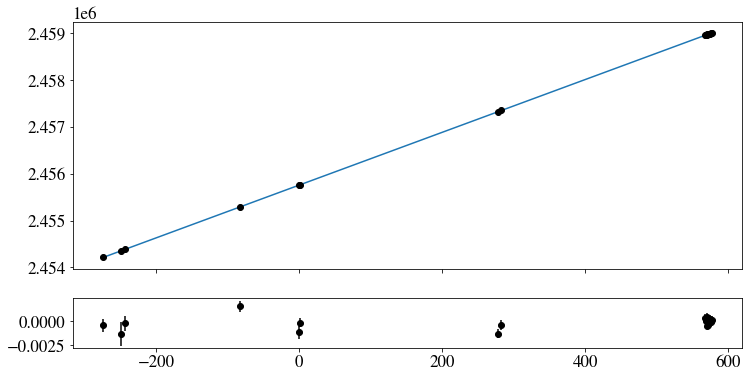

In [126]:
T0_Ivshina = 2455756.4270934
P_Ivshina = 5.6334696164  
orbits_ti = np.arange(np.min(combined_data["Orbit number"]), np.max(combined_data["Orbit number"]), 1)

def expected_transit_times(theta, orbit_num):
    T0, Period = theta
    return orbit_num*Period+T0

data = {"Orbit number": orbits_ti,
       'T_mid': expected_transit_times(np.array([T0_Ivshina, P_Ivshina]), orbits_ti)}
df_ti = pd.DataFrame(data=data)

timing_preds = expected_transit_times(np.array([T0_Ivshina, P_Ivshina]), combined_data["Orbit number"])

fig, axes = plt.subplots(2,1, figsize=(12, 6),  sharex=True,  gridspec_kw={'height_ratios': [3, 0.6]})

ax = axes[0]
ax.errorbar(combined_data["Orbit number"], combined_data["T_mid"],yerr=combined_data["Uncertainty (days)"], fmt = 'o', color='k')
ax.plot(df_ti['Orbit number'], df_ti['T_mid'])

ax = axes[1]
ax.errorbar(combined_data["Orbit number"], combined_data["T_mid"]-timing_preds,yerr=combined_data["Uncertainty (days)"], fmt = 'o', color='k')


solnx = np.array([T0_Ivshina, P_Ivshina])

In [127]:
def log_prior(theta):
    T0, Period = theta
    if 5.0<Period<6.0:
        return 0.0
    return -np.inf

In [128]:
def log_probability(theta, orbit_num, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + loglikelihood(theta, orbit_num, y, yerr)

In [129]:
width = np.array([15,5e-5])#[2e2, 2, 0.1, 0.05, 3, 0.25, 0.21]

out = edm.edmcmc(log_probability, solnx, width,
             args=(orbit_num_np,T_mid_np,T_mid_err_np), nwalkers=200, nlink = 40000, nburnin=5000)
print(np.median(out.flatchains[:,0]), '+/-', np.std(out.flatchains[:,0]), ';    ', np.median(out.flatchains[:,1]), '+/-', np.std(out.flatchains[:,1]))


/Users/zdebeurs/opt/anaconda3/lib/python3.8/site-packages/edmcmc.py:259: RuntimeWarning: overflow encountered in exp
  qs = np.exp(lastneglogl - theseneglogls)


0 days, 00:00:00.0 remains. Link 40000 of 40000. Acceptance Rate= 0.35
2455756.4268542603 +/- 1.6021489920882093 ;     5.633469881744309 +/- 0.0026279539628068778


In [130]:
np.shape(out.flatchains)

(7000000, 2)

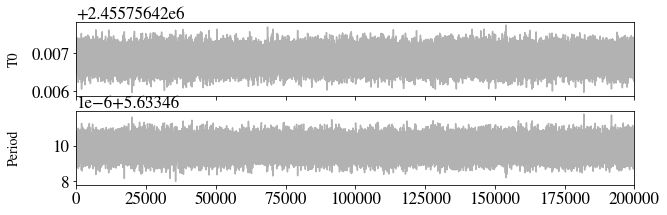

In [131]:
fig, axes = plt.subplots(len(solnx), figsize=(10, 1.5*len(solnx)), sharex=True)
samples = out.flatchains[6800000:,]
labels = ["T0", "Period"]
for i in range(len(labels)):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], size=14)
    ax.yaxis.set_label_coords(-0.1, 0.5)

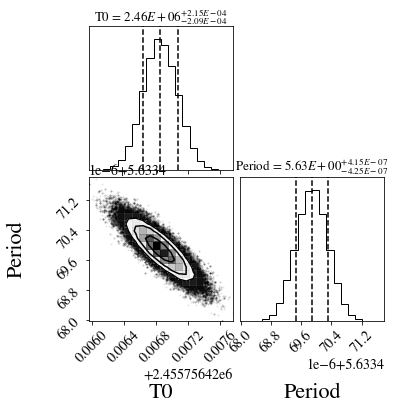

In [132]:
# global variable - set font-size to 14
plt.rcParams['font.size'] =14

# plot corner plot
fig = corner.corner(
    out.flatchains[6800000:,],
    labels=labels,
    quantiles=[0.159, 0.5, 0.841],
    show_titles=True,
    title_fmt=".2E",
    title_kwargs=dict(fontsize=13),
    label_kwargs=dict(fontsize=22),
    labelpad = 0.13)

#fig.suptitle(eval_method, fontsize=25)

# revert global font-size to 17
plt.rcParams['font.size'] =17

In [133]:
flat_samples = out.get_chains(nthin =5, nburnin = 1500, flat=True)

from IPython.display import display, Math

for i in range(len(labels)):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.8e}_{{-{1:.5e}}}^{{{2:.5e}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [134]:
T0_mcmc = np.percentile(flat_samples[:, 0], [50])[0]
T0_sig_mcmc = np.max(np.diff(np.percentile(flat_samples[:, 0], [16, 50, 84])))
Period_mcmc = np.percentile(flat_samples[:, 1], [50])[0]
Period_sig_mcmc = np.max(np.diff(np.percentile(flat_samples[:, 1], [16, 50, 84])))

T_mid_expected_mcmc = expected_transit_times(np.array([T0_mcmc, Period_mcmc]), orbit_num_np)

In [135]:
# create pandas dataframe based on these fits

edmcmc_ttv_data = {'T_mid_expected_mcmc': T_mid_expected_mcmc}
edmcmc_ttv_data= {'Instrument':combined_data["Instrument"],
                  'Orbit number': combined_data['Orbit number'],
                  'T_mid_expected_mcmc': T_mid_expected_mcmc,
                  'TTV (days)': combined_data['T_mid']- T_mid_expected_mcmc,
                  "TTV (minutes)": (combined_data['T_mid']- T_mid_expected_mcmc)*24*60 ,
                  "Uncertainty (days)": combined_data["Uncertainty (days)"],
                  "Uncertainty (minutes)": combined_data["Uncertainty (days)"]*24*60 }

edmcmc_ttv_df = pd.DataFrame(data = edmcmc_ttv_data)
edmcmc_ttv_df

# make a subset 
edmcmc_spitz_df = edmcmc_ttv_df[edmcmc_ttv_df['Instrument'] =='Spitzer']
edmcmc_TESS_df = edmcmc_ttv_df[edmcmc_ttv_df['Instrument'] =='TESS']
edmcmc_hatnet_df = edmcmc_ttv_df[edmcmc_ttv_df['Instrument'] =='HATNet']
edmcmc_spitz2017_df = edmcmc_ttv_df[edmcmc_ttv_df['Instrument'] =='Spitzer2017']

edmcmc_ttv_df

,Instrument,Orbit number,T_mid_expected_mcmc,TTV (days),TTV (minutes),Uncertainty (days),Uncertainty (minutes)
0,Spitzer,-249.0,2.454354e+06,-0.001014,-1.460094,0.001200,1.728000
1,HATNet,-243.0,2.454387e+06,0.000077,0.110528,0.000740,1.065600
2,Spitzer,-83.0,2.455289e+06,0.001796,2.585800,0.000600,0.864000
3,Spitzer,0.0,2.455756e+06,-0.000884,-1.273652,0.000670,0.964800
4,TESS,568.0,2.458956e+06,0.000433,0.623162,0.000429,0.617616
5,TESS,569.0,2.458962e+06,0.000133,0.191333,0.000377,0.543456
6,TESS,570.0,2.458968e+06,0.000513,0.738703,0.000420,0.604512
7,TESS,571.0,2.458973e+06,-0.000387,-0.557127,0.000346,0.498240
8,TESS,572.0,2.458979e+06,-0.000257,-0.369756,0.000305,0.439200
9,TESS,573.0,2.458984e+06,-0.000137,-0.196786,0.000494,0.711504


(556.0, 587.0)

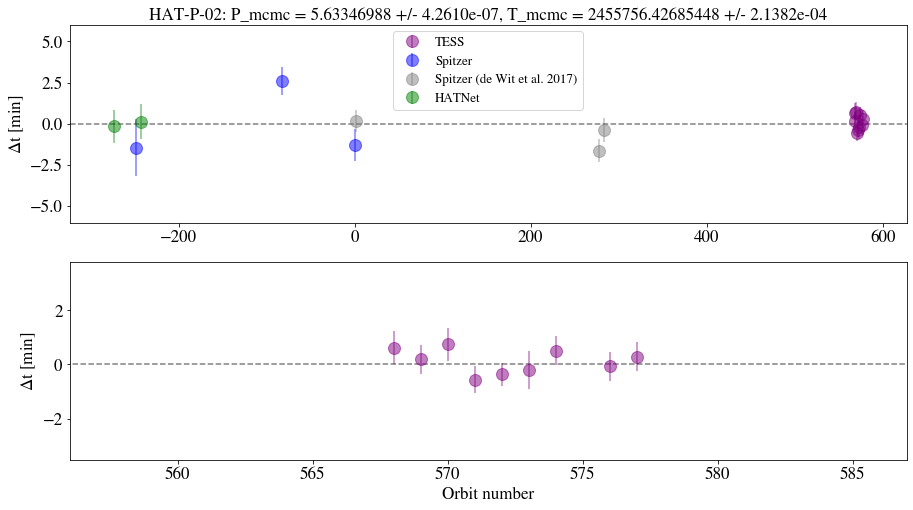

In [141]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = axes[0]
xmin = np.min(edmcmc_ttv_df["Orbit number"])-50
xmax =  np.max(edmcmc_ttv_df["Orbit number"])+50
ax.errorbar(edmcmc_TESS_df["Orbit number"], edmcmc_TESS_df["TTV (minutes)"],yerr= edmcmc_TESS_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color='purple', label="TESS")
ax.errorbar(edmcmc_spitz_df["Orbit number"], edmcmc_spitz_df["TTV (minutes)"],yerr= edmcmc_spitz_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color='blue', label="Spitzer")
ax.errorbar(edmcmc_spitz2017_df["Orbit number"], edmcmc_spitz2017_df["TTV (minutes)"],yerr= edmcmc_spitz2017_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color='grey', label="Spitzer (de Wit et al. 2017)")
ax.errorbar(edmcmc_hatnet_df["Orbit number"], edmcmc_hatnet_df["TTV (minutes)"],yerr= edmcmc_hatnet_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color='green', label="HATNet")

#ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(xmin, xmax)
ax.set_ylim(-6, 6)
ax.legend(prop={'size': 13},loc="upper center")
ax.set_title("HAT-P-02: P_mcmc = %.8f +/- %.4e, T_mcmc = %.8f +/- %.4e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc), 
             size=17)

ax = axes[1]
xmin = np.min(edmcmc_ttv_df["Orbit number"])-50
xmax =  np.max(edmcmc_ttv_df["Orbit number"])+50
ax.errorbar(edmcmc_ttv_df["Orbit number"], edmcmc_ttv_df["TTV (minutes)"],yerr= edmcmc_ttv_df["Uncertainty (minutes)"], 
             fmt = 'o',markersize=12, alpha = 0.5, color="purple")#, label="P_mcmc = %.5f +/- %.3e, T_mcmc = %.5f +/- %.3e" %(Period_mcmc, Period_sig_mcmc,T0_mcmc, T0_sig_mcmc))#, markersize=5)
ax.set_xlabel("Orbit number")
ax.set_ylabel("$\Delta$t [min]")
ax.hlines(y = 0, xmin=xmin, xmax = xmax, linestyle="--", color='k', alpha=0.5)
ax.set_xlim(556, 587)#xmin, xmax)

In [4]:
edmcmc_ttv_data

NameError: name 'edmcmc_ttv_data' is not defined